In [6]:
!pip install cycler

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats

In [9]:
dados = [1,2,5,3,4]

In [ ]:
Média Artimética

In [10]:
np.mean(dados)

3.0

Média Geomátrica

In [11]:
gmean(dados)

2.6051710846973517

Média Harmônica

In [12]:
hmean(dados)

2.18978102189781

# Quando usar cada uma das médias?

Funções para plotar gráficos

In [110]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='red',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='blue',ms=15)
  plt.show()

In [111]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [112]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='blue')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = 'red')

### Considere os cenários

Exemplo de dados gerados a partir de uma **operação de adição**, a soma do valor 3 em cada elemento do vetor (relacionamento linear)

In [21]:
dados_linear = [1, 4, 7, 10, 13, 16, 19]

Calculando a média artimética

In [22]:
media = int(np.mean(dados_linear))

In [23]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 10


Plotando os dados e seu valor central

In [42]:
plot_lines(dados_linear,media)

In [83]:
plot_lines_horizontal(dados_linear,media)

NameError: name 'plot_lines_horizontal' is not defined

Exemplo de dados gerados a partir de uma **operação de multiplicação**, a cada multiplicação de cada elemento pelo valor de 3(relacionamento exponencial)

In [43]:
dados_exponencial = [1,3,9,27,81,243,729]

Calculando a média aritmética
(1+3+9+27+81+243+729) / 7 = 156,1


In [44]:
media = int(np.mean(dados_exponencial))

In [45]:
print("Valor da média artimética dos dados: {}".format(media))

Valor da média artimética dos dados: 156


In [46]:
plot_lines(dados_exponencial,media)

### Considerando agora a aplicação da média geométrica

Expecificando os mesmos dados com um relacionamento exponencial

Calculando a média Geométrica (1x3x9x27x81x243x729) = 10,460,353,203
Raiz 7ª de 10,460,353,203 = 33

In [53]:
media_geo = int(gmean(dados_exponencial))

In [54]:
print("Valor da média geométrica dos dados: {}".format(media_geo))

Valor da média geométrica dos dados: 33


In [56]:
plot_lines(dados_exponencial,media_geo)

Considerações importantes:
* A **média aritmética** produz um resultado interessante quando temos um **relacionamento aditivo** entre os números da amostra.
* Este relacionamento é chamado linear pois, ao exibir graficamente os valores tendem a seguir uma linha ascendente ou descendente.
* Já a **média geométrica** é mais apropriada quando temos uma amostra com um **relacionamento multiplicativo** ou exponencial
* A diferença entre as é que enquanto a média artitmética faz a soma de todos os elementos e depois a divisão, a média geométrica atua com a **multiplicação** entre os elementos e depois reescala através da raiz os valores para a mesma unidade da amostra.

## Comparando as médidas em um cenário real.
Verificando os valores de avaliações de dois cafés

Hard Rock café Gramado vs Hard Rock café Curitiba

**Hard Rock Café Gramado**
* Avaliações no TripAdvisor: 3,5
* Índice de Satisfação dos Clientes: 89%

**Hard Rock Café Curitiba**
* Avaliações no TripAdvisor: 4,5
* Índice de Satisfação dos Clientes: 75%

Aplicação de verificar o estabelecimento com a melhor avaliação em diferentes escalas.

Calculando a média aritmética

In [58]:
aval_gramado, aval_curitiba = 3.5, 4.5
indice_gramado, indice_curitiba = 89, 75

In [59]:
print("Média para Gramado: {}".format(np.mean([aval_gramado, indice_gramado])))

Média para Gramado: 46.25


In [60]:
print("Média para Curitiba: {}".format(np.mean([aval_curitiba, indice_curitiba])))

Média para Gramado: 39.75


Considerando a média aritmética o Hard Rock Café de Gramado é o estabelecimento melhor avaliado

Agora vamos considerar a possibilidade de fazer um reescala desses dados de avaliação do TripAdvisor.

In [62]:
print("Valores reescalados: {}, {}".format(aval_gramado*20,aval_curitiba*20))

Valores reescalados: 70.0, 90.0


Calculando a média aritmética

In [63]:
print("Média para Gramado: {}".format(np.mean([aval_gramado*20, indice_gramado])))
print("Média para Gramado: {}".format(np.mean([aval_curitiba*20, indice_curitiba])))

Média para Gramado: 79.5
Média para Gramado: 82.5


Considerando o mesmo cenário agora utilizando a média geométrica

In [65]:
print("Média para Gramado: {}".format(gmean([aval_gramado, indice_gramado])))
print("Média para Gramado: {}".format(gmean([aval_curitiba, indice_curitiba])))

Média para Gramado: 17.64936259472279
Média para Gramado: 18.371173070873837


#### Considerações 
* Os valores alterados para a mesma escala nos deral **resultados diferentes** mais próximos da realidade.
* Utilizando a média geométrica já nos entrega o resultado "correto" pois considera o **relacionamento multiplicativo** entre os dados da amostra.
* É importante notar que aplicando a média geométrica para os dados em **diferentes escalas** o retorno não está na mesma unidade da amostra.

### Média Harmônica

Percurso Total da Viagem 10Km
* CAMINHO DE IDA = 30KM/H
* CAMINHO DE IDA = 10KM/H

**Qual a velocidade média da viagem?**

Usando a média aritmética

In [67]:
np.mean([30,10])

20.0

**VIAGEM DE IDA - 5KM À 30KM/H**
* 30KM por 60 minutos = 1 km a cada 2 minutos = 1/2 km por minuto.
* 5KM a 1/2 km por minuto = 10 minutos.

**VIAGEM DE VOLTA - 5KM À 10KM/H**
* 10KM por 60 minutos = 1 km a cada 2 minutos = 1/6 km por minuto.
* 5KM a 1/2 km por minuto = 30 minutos.

Tempo total da Viagem = 40 minutos

proporção da viagem de ida em relação ao tempo total da viagem.

In [69]:
print("Proporção de tempo da viagem de ida em relação ao tempo total da viagem: {}%".format((10/40)*100))
print("Proporção de tempo da viagem de ida em relação ao tempo total da viagem: {}%".format((30/40)*100))

Proporção de tempo da viagem de ida em relação ao tempo total da viagem: 25.0%
Proporção de tempo da viagem de ida em relação ao tempo total da viagem: 75.0%


Calculando a Média Aritmética Ponderada

In [72]:
np.average([30,10], weights=[.25,.75])

15.0

In [73]:
hmean([30,10])

15.0

As médias seguem um relacionamento ordinal: **média harmônica < média geométrica < a média aritmética.**

Considerando os dados com o relacionamento aditivo.



In [74]:
dados = [1,4,7,10,13,16,19]

In [75]:
media_aritimetica,media_geometrica,media_hamonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [76]:
media_aritimetica,media_geometrica,media_hamonica

(10.0, 7.3, 4.15)

Dados: [4, 4, 4, 4.67, 5, 5, 6, 8, 27.0, 156.14]
Media aritmética: 156.14, Média Geométrica: 27.0, Média Harmonica: 4.67


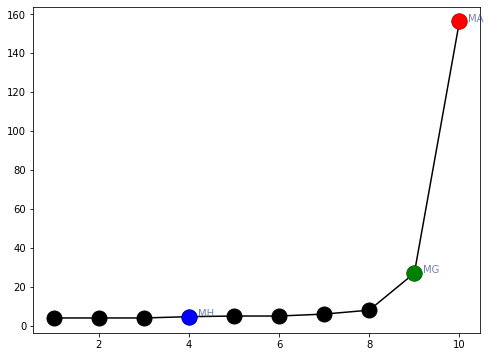

In [113]:
plot_line_means(dados,media_aritimetica,media_geometrica,media_hamonica)

Considerando os dados com o relacionamento multiplicativo.

In [85]:
dados = [1,3,9,27,81,243,729]

In [86]:
media_aritimetica,media_geometrica,media_hamonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [87]:
media_aritimetica,media_geometrica,media_hamonica

(156.14, 27.0, 4.67)

Graficamente

Dados: [4, 4, 4, 4.67, 4.67, 5, 5, 6, 8, 27.0, 27.0, 156.14, 156.14]
Media aritmética: 156.14, Média Geométrica: 27.0, Média Harmonica: 4.67


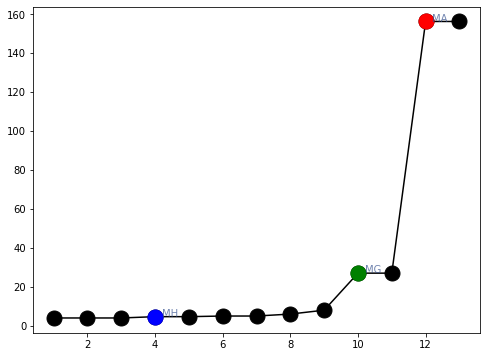

In [114]:
plot_line_means(dados,media_aritimetica,media_geometrica,media_hamonica)

Moda - Valores mais frequentes da distribuição

In [89]:
dados = [4,5,4,6,5,8,4]

In [90]:
stats.mode(dados)

ModeResult(mode=array([4]), count=array([3]))

In [91]:
dados_bimodal = [4,5,4,6,5,8,4,4,5,5]

In [92]:
from collections import Counter

In [93]:
def calcula_moda(dados):
    number_counts = Counter(dados)
    print(number_counts)
    modes = [val for val,count in number_counts.items()
             if count == max(number_counts.values())]
    return modes

In [94]:
calcula_moda(dados_bimodal)

Counter({4: 4, 5: 4, 6: 1, 8: 1})


[4, 5]

In [95]:
dados_amodal=[1,2,3,4,5]

In [96]:
calcula_moda(dados_amodal)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})


[1, 2, 3, 4, 5]

Mediana - É o valor da variável que divide os dados ordenados em duas partes iguais, freqüência.

In [98]:
dados_mediana7 = [7,1,5,2,3,1,6]

In [99]:
np.sort(dados_mediana7)

array([1, 1, 2, 3, 5, 6, 7])

In [100]:
np.median(dados_mediana7)

3.0

In [101]:
dados_mediana8 = [1,2,1,1,4,5,3,6]

In [102]:
np.sort(dados_mediana8)

array([1, 1, 1, 2, 3, 4, 5, 6])

In [103]:
np.median(dados_mediana8)

2.5

Medidas Separatrizes

In [104]:
notas = [13,25,69,72,33,41,28,17,65]

In [105]:
np.sort(notas)

array([13, 17, 25, 28, 33, 41, 65, 69, 72])

Q1 - Primeiro Quartil

In [115]:
np.quantile(notas,.25)

25.0

Q2 - Segundo Quartil

In [116]:
np.quantile(notas,.50)

33.0

Comparando com o valor da mediana

In [117]:
np.median(notas)

33.0

Q3 - Terceiro Quartil

In [118]:
np.quantile(notas,.75)

65.0

P25 - Percentil25 = Q1

In [119]:
np.percentile(notas,25)

25.0

P50 - Percentil 50 = Q2

In [120]:
np.percentile(notas,50)

33.0

P75 - Percentil 50 = Q3

In [121]:
np.percentile(notas,75)

65.0